In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_1samp, wilcoxon

# Difference between wilcox and ttest
# ttest: used for parameterized
# wilcox: used for non parameterized
# parameterized is used if the data is normally distributed
# If characteristic of data is not known( if its not normally distributed) then its safe to use wilcox
# For one sampled t test we can either go for parametrised or non parameterised

from statsmodels.stats.power import ttest_power

In [4]:
daily_intake = np.array([5560,5770,7640,5180,5690,6435,6803,7689,6876,8213,8765])

In [8]:
population_mean = 7600
# H0 = Mean is 7600
# H1 = Mean is not 7600

In [9]:
t_statistics, p_value = ttest_1samp(daily_intake,population_mean)
print(t_statistics,p_value)

-2.2925841964555027 0.04481624562570511


In [10]:
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


In [15]:
t_statistics, p_value = wilcoxon(daily_intake -population_mean)
print(t_statistics,p_value)

12.5 0.06821657316330874


In [17]:
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


11

In [24]:
# Power of test
effect_size = (np.mean(daily_intake) - population_mean)/np.std(daily_intake)
power = ttest_power(effect_size, nobs=np.size(daily_intake), alpha=0.05, alternative='two-sided')
power

0.5834930699381619

In [26]:
# 58.3% probability in rejecting null hypothesis when null hypothesis is false

(array([1., 3., 0., 1., 2., 0., 2., 0., 1., 1.]),
 array([5180. , 5538.5, 5897. , 6255.5, 6614. , 6972.5, 7331. , 7689.5,
        8048. , 8406.5, 8765. ]),
 <a list of 10 Patch objects>)

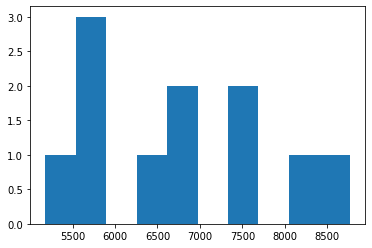

In [27]:
plt.hist(daily_intake)

{'whiskers': [<matplotlib.lines.Line2D at 0x11cc13d30>,
 'caps': [<matplotlib.lines.Line2D at 0x11cc24400>,
 'boxes': [<matplotlib.lines.Line2D at 0x11cc13940>],
 'medians': [<matplotlib.lines.Line2D at 0x11cc24a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x11cc24dd8>],
 'means': []}

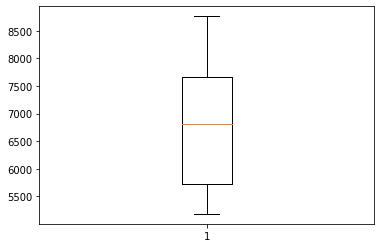

In [28]:
plt.boxplot(daily_intake)

## Two sample testing

In [39]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
## paired testing (dependent testing): involves a sample data which talks about same sample subject to same test. 
#       wilcoxon and ttest_1samp come into picture in this 
## unpaired testing (independent testing): when the underlying sample or the data set collected has two sample that 
#       are not related to each other, but the same test is applied on both the sample and variable values 
#       are calculated. We use ttest_ind (for parameterized) and mannwhitneyu (for non parameterized)

# Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.
# Shapiro test is used to identify if a single univariate distribution is normally distributed or not
from statsmodels.stats.power import ttest_power
import pandas as pd

In [40]:
# This is unpaired test, we have two different samples (diabetic and non diabetic)
# The diabetic sample might be from a different population
# The non diabetic might be from a different population
weight = np.array([
# sugar consumption in grams and stature (0=diabetic, 1=non diabetic)
[9.31, 0],
[7.76, 0],
[6.98, 1],
[7.88, 1],
[8.49, 1],
[10.05, 1],
[8.80, 1],
[10.88, 1],
[6.13, 1],
[7.90, 1],
[11.51, 0],
[12.59, 0],
[7.05, 1],
[11.85, 0],
[9.99, 0],
[7.48, 0],
[8.79, 0],
[8.69, 1],
[9.68, 0],
[8.58, 1],
[9.19, 0],
[8.11, 1]])


# This is a paired testing. Data is from the same population
# pre and post-Exercise food energy intake
intake = np.array([
[5460, 3980],
[5230, 4890],
[5640, 3885],
[6180, 5160],
[6390, 5645],
[6512, 4650],
[6765, 6109],
[7515, 5975],
[7515, 6790],
[8230, 6970],
[8770, 7335],
])

In [41]:
group1 = weight[:,1] == 0
group1 = weight[group1][:,0]

group2 = weight[:,1] == 1
group2 = weight[group2][:,0]

In [42]:
group1

array([ 9.31,  7.76, 11.51, 12.59, 11.85,  9.99,  7.48,  8.79,  9.68,
        9.19])

In [43]:
group2

array([ 6.98,  7.88,  8.49, 10.05,  8.8 , 10.88,  6.13,  7.9 ,  7.05,
        8.69,  8.58,  8.11])

In [50]:
# H0 = The two groups have the same mean
# H1 = The two groups have different mean
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)
if p_value > 0.05:
    print("Fail to reject H0")
else:
    print("Reject H0")

2.3730593333971224 0.02777741611352253
Reject H0


In [49]:
# if data was non parametric
u , p_value = mannwhitneyu(group1, group2)
print(u, p_value)
if p_value > 0.05:
    print("Fail to reject H0")
else:
    print("Reject H0")

29.0 0.022156896141583025
Reject H0


In [51]:
# Paired testing 
# We use the ttest_1samp for 2 sample parametric data
pre = intake[:,0]
post = intake[:, 1]
t_statistic, p_value = ttest_1samp(post - pre, 0)
print(t_statistic, p_value)
if p_value > 0.05:
    print("Fail to reject H0")
else:
    print("Reject H0")

-7.750633257827653 1.552189414812135e-05
Reject H0


In [52]:
# We use the wilcoxon for 2 sample non parametric data
z_statistic, p_value = wilcoxon(post-pre)
print(z_statistic, p_value)
if p_value > 0.05:
    print("Fail to reject H0")
else:
    print("Reject H0")

0.0 0.0033456181158508813
Reject H0


In [56]:
# Levene test
# H0 = variances are same
# H1 = variances are not same
result = levene(post, pre)
if result.pvalue > 0.05:
    print("Fail to reject H0")
else:
    print("Reject H0")

Fail to reject H0


In [69]:
# shapiro 
shapiro(post)

(0.9546877145767212, 0.7041629552841187)

In [83]:
# power of test
(np.mean(pre) - np.mean(post)) / np.sqrt(((11-1)*np.var(pre) + (11-1)*np.var(post)) / (11+11-2))

n1 = np.size(pre)
n2 = np.size(post)
s1Square = np.var(pre)
s2Square = np.var(post)

SDpool = np.sqrt((((n1-1)*s1Square)+((n2-1)*s2Square))/(n1+n2-2))

effect_size = (np.mean(pre) - np.mean(post)) / SDpool

In [85]:
ttest_power(effect_size, nobs= n1, alpha = 0.05, alternative = 'two-sided')

0.8805237687647913

## Chi Square Test

In [86]:
from scipy.stats import chisquare, chi2_contingency

In [97]:
car = pd.read_csv('SM4-car (1).csv',header=None,usecols =[0,1,2,3,4,5])
car.head()

,0,1,2,3,4,5
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [98]:
car.describe()

,0,1,2,3,4,5
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,med,med,5more,more,small,med
freq,432,432,432,576,576,576


In [102]:
car.rename(columns={0: 'buying', 1: 'maint', 2: 'doors', 3: 'persons', 4: 'lug_boot', 5: 'safety'}, inplace=True)
car.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [104]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
dtypes: object(6)
memory usage: 81.1+ KB


In [109]:
# H0: All proportion's are the same
# H1: Atleast one proportion differs from other

chisquare(car['doors'].value_counts())
# fail to reject H0

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [110]:
chisquare(car['lug_boot'].value_counts())

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [114]:
# Two sample 
coross_tab = pd.crosstab(car['doors'], car['lug_boot'])
coross_tab

lug_boot,big,med,small
doors,,,
2,144,144,144
3,144,144,144
4,144,144,144
5more,144,144,144


In [116]:
chi2_contingency(coross_tab)

(0.0, 1.0, 6, array([[144., 144., 144.],
        [144., 144., 144.],
        [144., 144., 144.],
        [144., 144., 144.]]))